In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import dabl 
import matplotlib.pyplot as plt
import dc_stat_think as dcst

from sklearn.metrics import confusion_matrix, classification_report

## part 1 
1. Load the dataset using pandas and explore the various features of the dataset
2. Plot chart of the labels values
3. Create a heatmap of different features from the dataset.

In [2]:
df = pd.read_csv('../data/diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.Outcome.unique()

array([1, 0])

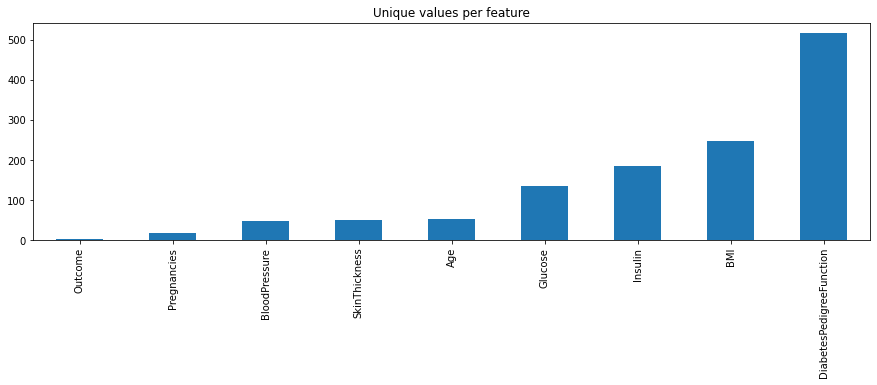

In [5]:
# find number of unique entries for each features
unique_values = df.nunique().sort_values()
# select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar( figsize=(15, 4), title="Unique values per feature")
plt.show()

Target looks like classification


/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 1 outliers in column Insulin.
  warn("Dropped {} outliers in column {}.".format(
/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/dabl/plot/utils.py:632: UserWarning: Dropped 1 outliers in column SkinThickness.
  warn("Dropped {} outliers in column {}.".format(


Linear Discriminant Analysis training set score: 0.737


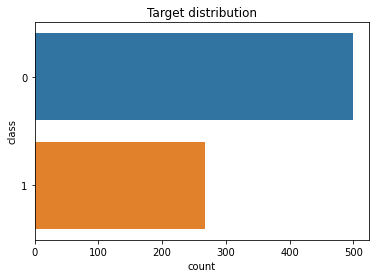

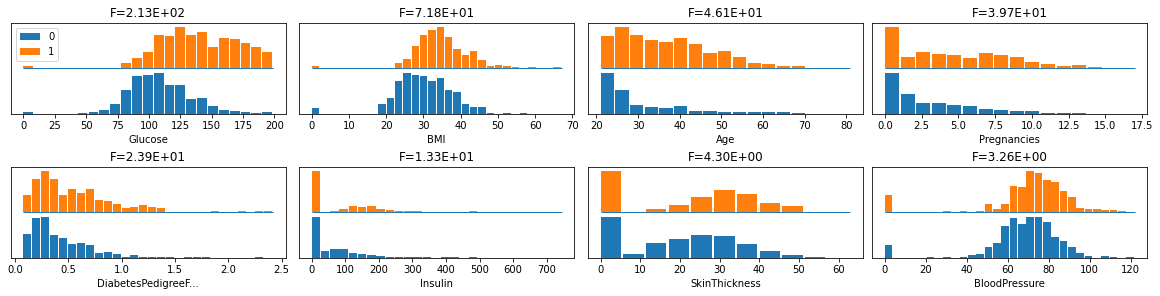

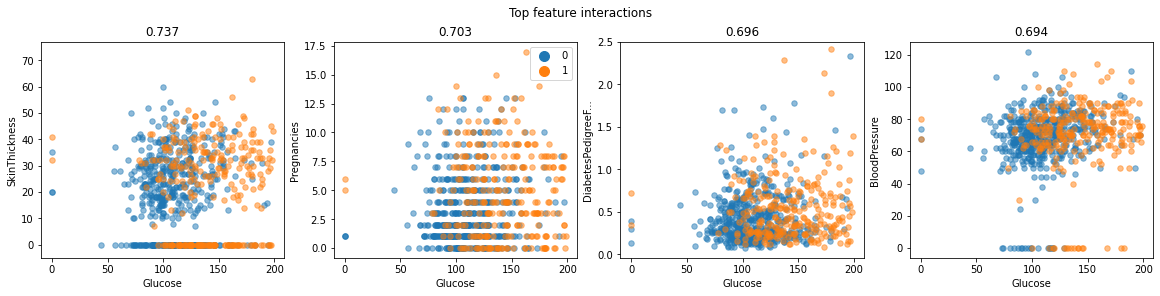

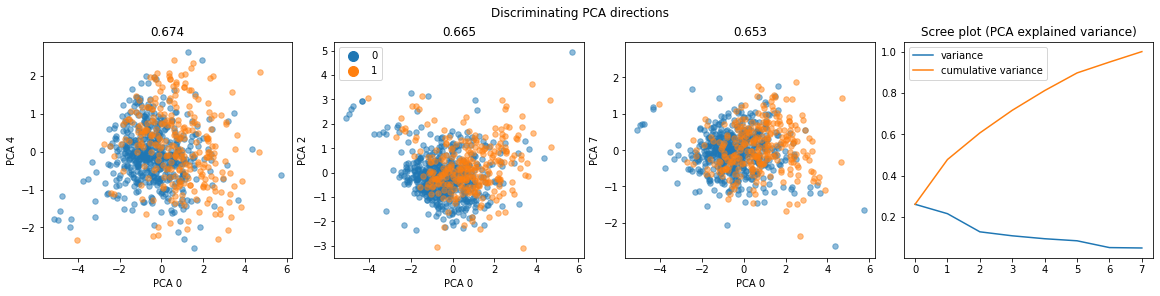

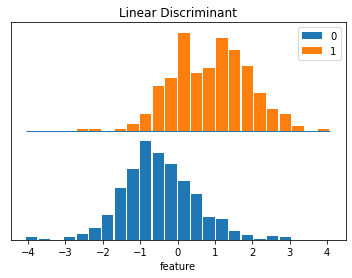

In [6]:
dabl.plot(df, target_col = 'Outcome')
plt.show()

## part 2
1. Build ANN models with 3 layers, 4 layers, and 5 layers, and note the accuracies.
2. Split the test set into 30%, 40%, and 10% and build the model.
3. Build a model with and without Dropout and BatchNorm and check the
difference inaccuracies.
4. Check the change inaccuracies for when the “NaN” in the data frame is
replaced by “0”, mean, and when completely removed.
5. Train the model with any 3 different batch sizes and check the
accuracies.
6. Train models for 10, 50, 100 , 200 epocs.


In [34]:
# there are no Nan in the data set to my observations 
missing = [df.isnull().sum(),100 * df.isnull().mean()]

m = pd.DataFrame(missing)
m = m.T
m.columns=['count', '%']
m = m.sort_values(by='count',ascending=False)
m.head()

,count,%
Pregnancies,0.0,0.0
Glucose,0.0,0.0
BloodPressure,0.0,0.0
SkinThickness,0.0,0.0
Insulin,0.0,0.0


In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
Y = df.Outcome

X = df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

## 2.1.1 - 3 layer ANN

In [10]:
def create_baseline():
    
    model = Sequential()
    model.add(Dense(10,input_dim=8,activation='relu'))
    model.add(Dense(10,input_dim=8,activation='relu'))
   
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

### test with and with out scaling X 

In [14]:
estimator = KerasClassifier(build_fn=create_baseline,epochs=20,batch_size=5,verbose=0)

kfold = StratifiedKFold(n_splits=5,shuffle=True)
results = cross_val_score(estimator,X,Y,cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-14-43ecd7ecc11e>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=20,batch_size=5,verbose=0)


Baseline: 64.19% (5.89%)


In [15]:

# with scaled X

In [16]:
estimator = KerasClassifier(build_fn=create_baseline,epochs=20,batch_size=5,verbose=0)

kfold = StratifiedKFold(n_splits=5,shuffle=True)
results = cross_val_score(estimator,X_scaled,Y,cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-16-58e2ee4cdf8c>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=20,batch_size=5,verbose=0)


Baseline: 75.40% (3.78%)


### Insight 
- scaled X improved baseline accuracy by 10%

## 2.1.2 trying 4 layers 

In [19]:
def create_baseline():
    
    model = Sequential()
    model.add(Dense(10,input_dim=8,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [20]:
estimator = KerasClassifier(build_fn=create_baseline,epochs=20,batch_size=5,verbose=0)

kfold = StratifiedKFold(n_splits=5,shuffle=True)
results = cross_val_score(estimator,X_scaled,Y,cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-20-58e2ee4cdf8c>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=20,batch_size=5,verbose=0)


Baseline: 74.87% (3.57%)


### Insight 
- extra model showing over fitting by no increase accuracy 

In [21]:
## 5 layers

def create_baseline():
    
    model = Sequential()
    model.add(Dense(10,input_dim=8,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=create_baseline,epochs=20,batch_size=5,verbose=0)

kfold = StratifiedKFold(n_splits=5,shuffle=True)
results = cross_val_score(estimator,X,Y,cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-21-22244d91948b>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=20,batch_size=5,verbose=0)


Baseline: 69.01% (2.99%)


### increase epochs 

In [37]:
def create_baseline():
    
    model = Sequential()
    model.add(Dense(10,input_dim=8,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=create_baseline,epochs=10,batch_size=5,verbose=0)

kfold = StratifiedKFold(n_splits=5,shuffle=True)
results = cross_val_score(estimator,X,Y,cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-37-f0780a64548e>:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=10,batch_size=5,verbose=0)


Baseline: 68.10% (2.98%)


In [38]:

## trying 100 epochs on 3 layers 
estimator = KerasClassifier(build_fn=create_baseline,epochs=100,batch_size=5,verbose=0)

kfold = StratifiedKFold(n_splits=5,shuffle=True)
results = cross_val_score(estimator,X,Y,cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-38-edac56d332fb>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=100,batch_size=5,verbose=0)


Baseline: 73.69% (2.36%)


In [39]:

## trying 100 epochs on 3 layers 
estimator = KerasClassifier(build_fn=create_baseline,epochs=100,batch_size=5,verbose=0)

kfold = StratifiedKFold(n_splits=10,shuffle=True)
results = cross_val_score(estimator,X,Y,cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-39-5f82ec97f4fb>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=100,batch_size=5,verbose=0)


Baseline: 72.53% (2.59%)


## 2.2 Changing n_splits result
- Split the test set into 30%, 40%, and 10% and build the model.

### 2.2.1 30% test split 

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=45)

In [28]:
def create_baseline():
    
    model = Sequential()
    model.add(Dense(10,input_dim=8,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=create_baseline,epochs=20,batch_size=5,verbose=0)

estimator.fit(X_train,y_train)
y_pred = estimator.predict(X_test)
print(classification_report(y_test,y_pred))

<ipython-input-28-a75e6fe9992b>:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=20,batch_size=5,verbose=0)


              precision    recall  f1-score   support

           0       0.74      0.88      0.80       154
           1       0.61      0.39      0.48        77

    accuracy                           0.71       231
   macro avg       0.68      0.63      0.64       231
weighted avg       0.70      0.71      0.69       231



## 2.2.2 40% test split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=45)
def create_baseline():
    
    model = Sequential()
    model.add(Dense(10,input_dim=8,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=create_baseline,epochs=100,batch_size=5,verbose=0)

estimator.fit(X_train,y_train)
y_pred = estimator.predict(X_test)
print(classification_report(y_test,y_pred))

<ipython-input-29-71f8803c3a70>:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=100,batch_size=5,verbose=0)


              precision    recall  f1-score   support

           0       0.81      0.78      0.79       203
           1       0.60      0.65      0.62       105

    accuracy                           0.73       308
   macro avg       0.71      0.71      0.71       308
weighted avg       0.74      0.73      0.74       308



## 2.2.3 50% test split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=45)
def create_baseline():
    
    model = Sequential()
    model.add(Dense(10,input_dim=8,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=create_baseline,epochs=100,batch_size=5,verbose=0)

estimator.fit(X_train,y_train)
y_pred = estimator.predict(X_test)
print(classification_report(y_test,y_pred))

<ipython-input-30-62889f59d1f5>:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=100,batch_size=5,verbose=0)


              precision    recall  f1-score   support

           0       0.82      0.68      0.74       250
           1       0.54      0.72      0.62       134

    accuracy                           0.69       384
   macro avg       0.68      0.70      0.68       384
weighted avg       0.72      0.69      0.70       384



### 40% test split had the highest combined f1-score

## 3.1 adding dropout layer to model 

In [33]:
## adding dropout layer 

def create_baseline():
    
    model = Sequential()
    model.add(Dense(10,input_dim=8,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64,input_dim=10,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64,input_dim=64,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=create_baseline,epochs=20,batch_size=5,verbose=0)

kfold = StratifiedKFold(n_splits=5,shuffle=True)
results = cross_val_score(estimator,X,Y,cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-33-ba259d098ffb>:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=20,batch_size=5,verbose=0)


Baseline: 66.40% (2.53%)


In [ ]:
### 

### 5 batch size
- Train the model with any 3 different batch sizes and check the accuracies.

### 5.1 batch = 5

In [35]:
def create_baseline():
    
    model = Sequential()
    model.add(Dense(10,input_dim=8,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=create_baseline,epochs=50,batch_size=5,verbose=0)

kfold = StratifiedKFold(n_splits=5,shuffle=True)
results = cross_val_score(estimator,X,Y,cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-35-9c1076c16de4>:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=50,batch_size=5,verbose=0)


Baseline: 71.35% (4.21%)


### 5.2 batch = 1 

In [36]:
def create_baseline():
    
    model = Sequential()
    model.add(Dense(10,input_dim=8,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=create_baseline,epochs=50,batch_size=1,verbose=0)

kfold = StratifiedKFold(n_splits=5,shuffle=True)
results = cross_val_score(estimator,X,Y,cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-36-1e472d1cb5a2>:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=50,batch_size=1,verbose=0)


Baseline: 71.87% (3.58%)


### 5.3 batch = 10

In [40]:
def create_baseline():
    
    model = Sequential()
    model.add(Dense(10,input_dim=8,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=create_baseline,epochs=50,batch_size=10,verbose=0)

kfold = StratifiedKFold(n_splits=5,shuffle=True)
results = cross_val_score(estimator,X,Y,cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-40-3ff48195ff0c>:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=50,batch_size=10,verbose=0)


Baseline: 68.22% (3.60%)


### Insight 
- increased batch size to ten decreased baseline accuracy

## 6 - Train models for 10, 50, 100 , 200 epocs.

### 6.1 10 epocs

In [46]:
def create_baseline():
    
    model = Sequential()
    model.add(Dense(10,input_dim=8,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=create_baseline,epochs=10,batch_size=5,verbose=0)

kfold = StratifiedKFold(n_splits=5,shuffle=True)
results = cross_val_score(estimator,X,Y,cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-46-f0780a64548e>:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=10,batch_size=5,verbose=0)


Baseline: 66.55% (3.40%)


### 6.2 50 epocs

In [47]:
def create_baseline():
    
    model = Sequential()
    model.add(Dense(10,input_dim=8,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=create_baseline,epochs=50,batch_size=5,verbose=0)

kfold = StratifiedKFold(n_splits=5,shuffle=True)
results = cross_val_score(estimator,X,Y,cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-47-9c1076c16de4>:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=50,batch_size=5,verbose=0)


Baseline: 74.86% (2.77%)


### 6.3 100 epocs

In [48]:
def create_baseline():
    
    model = Sequential()
    model.add(Dense(10,input_dim=8,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=create_baseline,epochs=100,batch_size=5,verbose=0)

kfold = StratifiedKFold(n_splits=5,shuffle=True)
results = cross_val_score(estimator,X,Y,cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-48-b2a7fe46e131>:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=100,batch_size=5,verbose=0)


Baseline: 69.40% (4.16%)


### 6.4 200 epocs

In [49]:
def create_baseline():
    
    model = Sequential()
    model.add(Dense(10,input_dim=8,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(10,input_dim=10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=create_baseline,epochs=200,batch_size=5,verbose=0)

kfold = StratifiedKFold(n_splits=5,shuffle=True)
results = cross_val_score(estimator,X,Y,cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

<ipython-input-49-432625d1dab8>:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_baseline,epochs=200,batch_size=5,verbose=0)


Baseline: 72.27% (3.91%)


### Insight

- 50 epochs had the highest accuracy, afterwards there is evidence of over fitting as the standard deviation increased from 200 epocs was higher than 50 with a simular baseline. 